In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import keras
from keras.layers import Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.applications.resnet import preprocess_input
print(keras.__version__)
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

2.11.0


In [ ]:
pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
input_folder = '/content/drive/MyDrive/rabies-data'
#######ration of split is 70%, 20% and 10%
splitfolders.ratio(input_folder, output="/content/drive/MyDrive/dataset",
                   seed=42, ratio=(.7, .2, .1),
                   group_prefix=None)

Copying files: 3709 files [18:50,  3.28 files/s]


In [ ]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100
train_path = '/content/drive/MyDrive/dataset/train'
valid_path = '/content/drive/MyDrive/dataset/val'

In [ ]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,)

In [ ]:
train_generator = data_generator.flow_from_directory(
    train_path,
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='sparse')

Found 3245 images belonging to 2 classes.


In [ ]:
validation_generator = data_generator.flow_from_directory(
    valid_path,
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='sparse')

Found 936 images belonging to 2 classes.


In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(image_resize, image_resize, 3)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=84, activation='relu'))
cnn_model.add(Dense(units=43, activation = 'softmax'))

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [ ]:
history = cnn_model.fit(train_generator,
                        batch_size=500,
                        epochs=5,
                        verbose=1,
                        validation_data = validation_generator)

Epoch 1/5
33/33 [==============================] - 1197s 36s/step - loss: 15.3509 - accuracy: 0.7485 - val_loss: 0.8666 - val_accuracy: 0.4637
Epoch 2/5
33/33 [==============================] - 202s 6s/step - loss: 0.6381 - accuracy: 0.7874 - val_loss: 0.5110 - val_accuracy: 0.8568
Epoch 3/5
33/33 [==============================] - 219s 7s/step - loss: 0.4154 - accuracy: 0.8604 - val_loss: 0.4331 - val_accuracy: 0.8536
Epoch 4/5
33/33 [==============================] - 200s 6s/step - loss: 0.3066 - accuracy: 0.8863 - val_loss: 0.4081 - val_accuracy: 0.8526
Epoch 5/5
33/33 [==============================] - 221s 7s/step - loss: 0.2144 - accuracy: 0.9202 - val_loss: 0.3855 - val_accuracy: 0.8494


In [ ]:
# test_generator = data_generator.flow_from_directory(
#     '/content/drive/MyDrive/dataset/test',
#     target_size=(image_resize, image_resize),
#     shuffle=False,
#     class_mode='sparse',
#     classes=['normal_dogs','rabid_dogs'],
#     batch_size=len(test_labels))
test_generator = '/content/drive/MyDrive/dataset/val/rabid_dogs/dr_16_2839',

Found 373 images belonging to 2 classes.


In [ ]:
test_images, test_labels = next(test_generator)
print(test_images.shape)
print(test_labels.shape)

(100, 224, 224, 3)
(100,)


In [ ]:
score = cnn_model.evaluate(test_generator,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8767


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

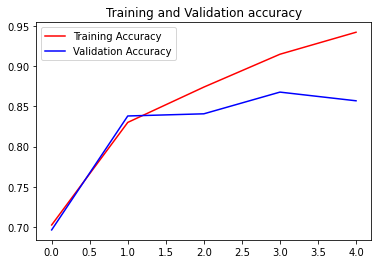

In [ ]:
accuracy = history.history['accuracy']          #aacuracy
val_accuracy = history.history['val_accuracy']  #validation
loss = history.history['loss']             #loss
val_loss = history.history['val_loss']     #validation loss

epochs = range(len(accuracy))              #no of epochs

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')         #dotted lines , b -> blue
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')    #bold lines
plt.title('Training and Validation accuracy')
plt.legend()

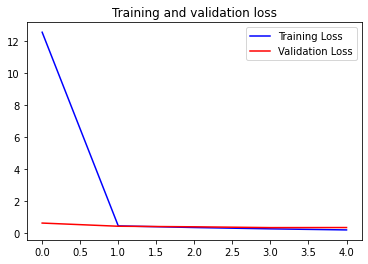

In [ ]:
plt.plot(epochs, loss, 'b', label='Training Loss')         #loss , r -> red
plt.plot(epochs, val_loss, 'r', label='Validation Loss')    #validation loss
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_probabilities = cnn_model.predict(test_generator)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
#predicted_classes = cnn_model.predict_classes(test_generator)
#getting the indices of the classes of images
y_true = test_labels

4/4 [==============================] - 10s 2s/step


In [ ]:
#plotting confusion matrix
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_true, predicted_classes)
#plt.figure(figsize = (25,25))
#sns.heatmap(cm, annot=True)